In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score


In [0]:
## 비지도 학습 - 군집

# 지도학습 : 데이터와 정답을 이용해서 패턴/규칙 파악
# 비지도학습 : 데이터만을 이용해서 유사도에 따른 패턴/규칙 파악

# 비지도학습의 대표적인 분석방법 : 군집
# k-means, 계층적 군집, 랜덤 포레스트

# 소비자유형 파악 - 타겟 마케팅 적용
# 범죄율이 높은 지역 검출
# 이미지/얼굴/손글씨 인식 - SVM
# 유전자 검사/지리정보를 이용해서 지형 탐사


# k-means 군집
# 서로 유사성이 높은 것끼리 관측값을 묶어 다수의 그룹으로 만듦
# 즉, 동일 그룹내 구성원간의 유사성은 높지만
# 다른 그룹의 구성원과의 유사성은 거의 없도록 하는 것
# => 군집분석 SSW, SSB


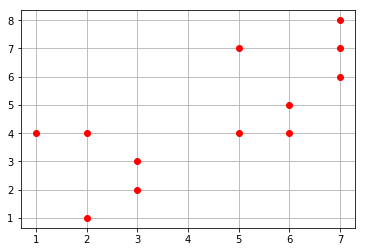

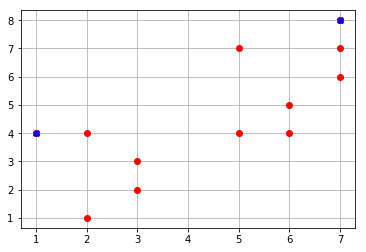

5.0
2.23606797749979
1.0
6.4031242374328485
5.0
4.123105625617661


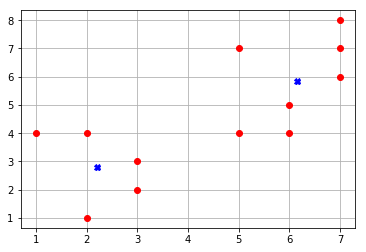

In [0]:
# k-means 알고리즘 간단하게 이해하기

x = 7,2,6,3,6,5,3,1,5,7,7,2
y = 8,4,4,2,5,7,3,4,4,7,6,1

plt.plot(x, y, 'ro')
plt.grid(True)
plt.show()



# 유사도 파악
# k-means 에서는 각 점간의 거리로 
# 비슷한 특성을 가지는 데이터를 묶음
# 따라서, 유사도 측정을 위해 기준점(centeroid) 선정
# => C1(1, 4), C2(7, 8)

plt.plot(x, y, 'ro')
plt.plot([1, 7], [4, 8], 'bX')
plt.grid(True)
plt.show()



# 센터로이드와 각 점간의 거리계산
# => 유클리드 거리 계산법

# A(x1, y1), B(x2, y2) 간의 거리 계산은
# sqrt((x2 - x1)**2 + (y2 - y1)**2) 로 함

#           C1(1, 4)     C2(7, 8)
# 5 ,7 :           5        2.236   => C2로 분류       
# 2, 4 :         1.0        6.403   => C1로 분류        
# 6, 4 :           5        4.123   => C2로 분류   

print(math.sqrt((5 - 1)**2 + (7 - 4)**2))
print(math.sqrt((5 - 7)**2 + (7 - 8)**2))
print(math.sqrt((2 - 1)**2 + (4 - 4)**2))
print(math.sqrt((2 - 7)**2 + (4 - 8)**2))
print(math.sqrt((6 - 1)**2 + (4 - 4)**2))
print(math.sqrt((6 - 7)**2 + (4 - 8)**2))

# 새로운 데이터 3, 5 => 거리 계산 후 C1으로 분류

# 모든 데이터에 대한 군집화가 수행된 후
# 새로운 센터로이드를 선정한 후
# 다시 유사도에 의한 군집 실시

# 새로운 센터로이드를 선정하는 방법은
# 각 군집별 평균값을 이용
# 즉, 군집 C1, C2의 각 X, Y 좌표간의 평균 계산

# C1의 새로운 센터로이드 지정
# 새로운 x 좌표 : 1, 2, 2, 3, 3 / 5 = 11 / 5 = 2.2
# 새로운 y 좌표 : 1, 2, 3, 4, 4 / 5 = 14 / 5 = 2.8


# C2의 새로운 센터로이드 지정
# 새로운 x 좌표 : 5, 5, 6, 6, 7, 7, 7 / 7 = 6.14
# 새로운 y 좌표 : 4, 4, 5, 6, 7, 7, 8 / 7 = 5.85

plt.plot(x, y, 'ro')
plt.plot([2.2, 6.14], [2.8, 5.85], 'bX')
plt.grid(True)
plt.show()


kms.labels_ : 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
-------------------------------------
엘보우SSE 계수 78.85144142614601
---------------------------------------
실루엣 : 



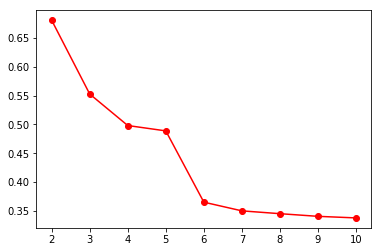

SSE(엘보우. inertia) : 



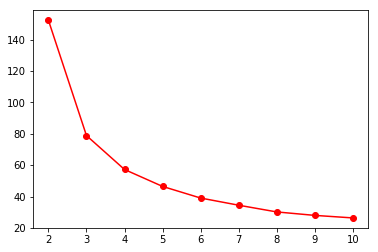

In [9]:
# iris 데이터셋을 이용한 군집 예제
from sklearn.datasets import load_iris


# 데이터 적재
iris = load_iris()

x_iris = iris.data
y_iris = iris.target
# => kmeans 성능 측정을 위해 오차행렬과 실루엣 계수를 위한 변수 정의


# kmeans 분석을 이용해서 군집 시행
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score

kms = KMeans(n_clusters=3, max_iter=100, random_state=1907111630)
# n_cluster : 군집 갯수
# max_iter : 군집화 시도 횟수

kms.fit(x_iris) 


# kmeans 분석 평가
# 군집된 결과는 kms.labels_에 저장되어 있음
confusion_matrix(y_iris, kms.labels_)

print('kms.labels_ : \n', kms.labels_)
print('-------------------------------------')


silhouette_score(x_iris, kms.labels_, metric='euclidean')
# 0.5528190123564091

print('엘보우SSE 계수', kms.inertia_) # => 78.85144142614601
# 엘보우SSE 계수 : 군집내 오차제곱합을 의미


# 실루엣 계수 : 군집 적합도를 수치로 나타낸 것
#               1에 가까울 수록 군집이 잘된 것으로 파악

# 참고 : iris 데이터셋 경우, 각 관측값에 대한 레이블을 
#        알고 있기 때문에 군집성공에 대한 정확도 파악 가능
#        하지만, 레이블이 없는 데이터의 경우 실루엣 계수와
#        엘보우 그래프(SSE)를 통해 적절한 군집 계수를 파악해야 함



# 적절한 군집 갯수 찾기와 그에 따른 실루엣계수 비교

silhouettes = []
inertias = []

for k in range(2, 11):
    kms = KMeans(n_clusters=k, max_iter=100)
    kms.fit(x_iris)
    
    ss = silhouette_score(x_iris, kms.labels_, metric='euclidean')
    el = kms.inertia_ 
    
    silhouettes.append(ss)
    inertias.append(el)

print('---------------------------------------')    
print('실루엣 : \n')
x = range(2, 11)
plt.plot(x, silhouettes, 'ro-')
plt.show()

print('SSE(엘보우. inertia) : \n')
x = range(2, 11)
plt.plot(x, inertias, 'ro-')
plt.show()






----------------------
centers : 
    sepal_length  sepal_width  petal_lenght  petal_width
0      5.901613     2.748387      4.393548     1.433871
1      5.006000     3.428000      1.462000     0.246000
2      6.850000     3.073684      5.742105     2.071053


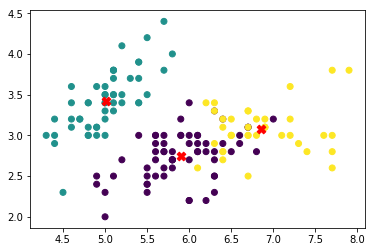

---------------
x_iris[:, 2] : 
 [1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 1.5 1.6 1.4 1.1 1.2 1.5 1.3 1.4
 1.7 1.5 1.7 1.5 1.  1.7 1.9 1.6 1.6 1.5 1.4 1.6 1.6 1.5 1.5 1.4 1.5 1.2
 1.3 1.4 1.3 1.5 1.3 1.3 1.3 1.6 1.9 1.4 1.6 1.4 1.5 1.4 4.7 4.5 4.9 4.
 4.6 4.5 4.7 3.3 4.6 3.9 3.5 4.2 4.  4.7 3.6 4.4 4.5 4.1 4.5 3.9 4.8 4.
 4.9 4.7 4.3 4.4 4.8 5.  4.5 3.5 3.8 3.7 3.9 5.1 4.5 4.5 4.7 4.4 4.1 4.
 4.4 4.6 4.  3.3 4.2 4.2 4.2 4.3 3.  4.1 6.  5.1 5.9 5.6 5.8 6.6 4.5 6.3
 5.8 6.1 5.1 5.3 5.5 5.  5.1 5.3 5.5 6.7 6.9 5.  5.7 4.9 6.7 4.9 5.7 6.
 4.8 4.9 5.6 5.8 6.1 6.4 5.6 5.1 5.6 6.1 5.6 5.5 4.8 5.4 5.6 5.1 5.1 5.9
 5.7 5.2 5.  5.2 5.4 5.1]
---------------
x_iris[:, 3] : 
 [0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 0.2 0.2 0.1 0.1 0.2 0.4 0.4 0.3
 0.3 0.3 0.2 0.4 0.2 0.5 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.4 0.1 0.2 0.2 0.2
 0.2 0.1 0.2 0.2 0.3 0.3 0.2 0.6 0.4 0.3 0.2 0.2 0.2 0.2 1.4 1.5 1.5 1.3
 1.5 1.3 1.6 1.  1.3 1.4 1.  1.5 1.  1.4 1.3 1.4 1.5 1.  1.5 1.1 1.8 1.3
 1.5 1.2 1.3 1.4 1.4 1.7 1.5 1.  1.1

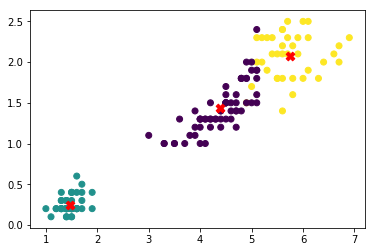

In [4]:
# 군집된 결과 확인 : sepal length/width
kms = KMeans(n_clusters=3, max_iter=100)
kms.fit(x_iris)

centers = pd.DataFrame(kms.cluster_centers_, 
                       columns=['sepal_length', 'sepal_width', 
                                'petal_lenght', 'petal_width'])
# cluster_centers_ : 군집별 중심점 좌표

print('----------------------')
print('centers : \n', centers)

x = centers['sepal_length']
y = centers['sepal_width']

plt.scatter(x_iris[:, 0], x_iris[:, 1], c=kms.labels_)
plt.scatter(x, y, s=75, marker='X', c='r') # 좌표 개념이기 때문에 marker 'X'로 3개 찍힘
plt.show()



# 군집된 결과 확인 : petal length/width
kms = KMeans(n_clusters=3, max_iter=100)
kms.fit(x_iris)

centers = pd.DataFrame(kms.cluster_centers_, 
                       columns=['sepal_length', 'sepal_width', 
                                'petal_length', 'petal_width'])
# cluster_centers_ : 군집별 중심점 좌표

x = centers['petal_length']
y = centers['petal_width'] 
print('---------------')
print('x_iris[:, 2] : \n', x_iris[:, 2])
print('---------------')
print('x_iris[:, 3] : \n', x_iris[:, 3])

plt.scatter(x_iris[:, 2], x_iris[:, 3], c=kms.labels_)
plt.scatter(x, y, s=75, marker='X', c='r') # 좌표 개념이기 때문에 marker 'X'로 3개 찍힘
plt.show()

In [12]:
# 실루엣 그래프 그리기
# kmeans_eval.py 파일 이용

#!pip install kmeans_eval
from kmeans_eval import visualize_silhouette

visualize_silhouette([2, 3, 4, 5, 6 ,7 ,8 ,9 ,10], x_iris)


# 적절한 실루엣 계수 선택방법

# k값을 조사해보면 군집수가 2일때 실루엣 계수값이 높지만
# 그 다음으로 높은 값인 k = 3으로 정하는 것이 무난
# 즉, 급격하게 값이 변하는 지점을 적절한 군집수로 선택

# 그래프 상에서는 빨간선에 각 군집별 모양이 넘치거나
# 모자라지 않는 형태가 가장 이상적임


ModuleNotFoundError: ignored

In [19]:
print(kms.labels_)
print()
#print(kms.labels_ == 0, 1)
#print(kms.labels_ == 1)

[3 1 1 1 3 3 1 3 1 1 3 1 1 1 3 3 3 3 3 3 3 3 1 3 1 1 3 3 3 1 1 3 3 3 1 1 3
 3 1 3 3 1 1 3 3 1 3 1 3 1 8 8 8 2 8 4 8 6 8 2 6 4 2 4 2 8 4 2 4 2 5 4 5 4
 4 8 8 8 4 2 2 2 2 5 2 4 8 4 2 2 2 4 2 6 2 2 2 4 6 2 0 5 7 0 0 7 2 7 0 9 0
 5 0 5 5 0 0 9 7 5 0 5 7 5 0 7 5 5 0 7 7 9 0 5 5 7 0 0 5 0 0 0 5 0 0 0 5 0
 0 5]

